In [1]:
!pip install -U pymonad

  Using cached PyMonad-2.4.0-py3-none-any.whl (29 kB)


In [ ]:
# partial (파이썬)
# 합성함수 ; 간단한 함수들 만들어놓고 합치면 새로운 함수가 됨.
# 이런 비슷한 개념 객체지향에서 -> AOP Programming => decorator / mixins
# mixin 은 가장 간단한 객체(기능 하나만 가진 클래스) 만들어서 다중상속 해서 기능 추가시키는 테크닉
# 함수형 프로그래밍은 간단한 함수를 합성함수로 만들어버리면 됨.
# 간단한 함수 여러개 조합해서 합성함수, 즉 남이 만든 함수를 합성함수 시켜버리면 상속이랑 비슷하게 쓸 수 있음.
# 상속 받아서 일부 수정하는 것. 그게 partial. 함수형 패러다임에서는 이걸 currying 이라고 함.
# 기존에 있는 함수를 가져다 쓰거나 일부 변경해서 새로운 함수로 만드는 것.

# 함수형 패러다임 자체가 요즘 java script 에서 도입했음.
# pymonad 로 한 번 해보자.

In [ ]:
# 합성함수 만들어서 새로운 함수 만드는 것 -> 객체지향에서 mixin(다중상속해서 쓰는 기법)

In [2]:
import pymonad

In [3]:
dir(pymonad)  # dir 나오게 조절된 애들이 있음. 아래 보면 많이 안나옴. 그래서 아래 테크닉을 쓴다.

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [4]:
# monad 가 함수형 패러다임에서 가장 어려운 개념
# functor 가 monad 에서 가장 쉬운 개념.
# 함수형 패러다임이 데이터 처리할 때 편함. 대표적인 것이 map -> map 이 functor 가 나옴.
# 실무에서는 expression 가지고 씀.
from pymonad.tools import curry

In [5]:
def add(x,y):
    return x+y

In [6]:
add(3,4)

7

In [7]:
add(3)
# 디폴트 값이 없으니까 인자 개수를 맞춰줘야 하기 때문에 에러가 발생함.

TypeError: add() missing 1 required positional argument: 'y'

In [8]:
# 먼저 partial
from functools import partial

In [10]:
add4 = partial(add, y=4) # y에 디폴트 값을 줌

In [11]:
add4(2,3)  # 위에서 partial 로 y의 디폴트 값을 정해줬기 때문에, y는 keyword 방식으로 해야 함.

TypeError: add() got multiple values for argument 'y'

In [12]:
add4(2)
# 기존의 함수에서 디폴트값을 변경시켜서 새로운 함수를 만드는 테크닉이 partial(파이썬에서)
# 이것을 함수형 패러다임에서는 보통 currying 이라고 함.

6

In [13]:
add4(2, y=3)

5

In [14]:
add3 = partial(add, 3)  # add 에 있는 인자 하나를 아예 3으로 바꾼 테크닉

In [15]:
add3(1)

4

In [16]:
add3(2,3)

TypeError: add() takes 2 positional arguments but 3 were given

In [17]:
@curry
def subtract(x,y):
    return x-y

In [24]:
subtract(4,3)

TypeError: <lambda>() takes 2 positional arguments but 3 were given

In [25]:
@curry(2) # curry 안에 파라미터 개수만큼 줘야 함.
def subtract(x,y):
    return x-y

In [26]:
subtract(3,4)

-1

In [29]:
sub3 = subtract(3)  # x에 3을 준 것.

In [30]:
sub3(4)

-1

In [ ]:
# curry 의 기능을 partial 로 일부만 준 것.

In [31]:
@curry
def xyz(a,b,c):
    return a*2 + b*3 + c

In [32]:
xyz(1)(2,3)

TypeError: '>=' not supported between instances of 'int' and 'function'

In [33]:
@curry(3)
def xyz(a,b,c):
    return a*2 + b*3 + c

In [34]:
xyz(1)(2,3)

11

In [35]:
xyz(1,2)(3)

11

In [ ]:
# partial 의 개념이 curry 에서 나왔다는 것.

In [ ]:
# functor 보자

In [36]:
from pymonad.maybe import Just

In [37]:
# Just 는 객체
a = Just(3)  # Functor

In [38]:
a

Just 3

In [ ]:
# functor 라는 애는, 값을 가지고 있는 객체인데, 매핑을 할 수 있는 값을 가진 객체를 functor
# mapping 할 수 있음. connect

In [39]:
from operator import neg

In [40]:
a.map(neg)  # 나 자신을 이렇게 map, 저렇게 map, 매핑할 수 있는 애를 functor 라고 함.

Just -3

In [41]:
# 판다스에서도 Series 가 functor.
import seaborn as sns

In [42]:
tips = sns.load_dataset('tips')

In [43]:
tips.tip.map(tips.tip)
# identity mapping. => functor   => 매핑해서 각각의 값을 어떻게 변화시킨다!

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
239     NaN
240    3.50
241    3.50
242     NaN
243    3.31
Name: tip, Length: 244, dtype: float64

In [44]:
a.map(neg).value  # 객체에서 값을 줌. 객체 였다가 값이 었다가 막 변할 수 있다는 것.

-3

In [ ]:
# functor 는 map 이 가능해서 값 변화시킬 수 있는 것. 즉 내 값을 다른 쪽에 매핑할 수 있다는 것.
# Applicative 는 apply 가 가능한 것
# apply 는 2개 이상의 인자를 받는 애. map 은 1개의 인자

### 딥러닝

In [2]:
# 텐서플로
# 함수형 패러다임으로 모델 만드는 것을 해보자. 이제부터가 텐서플로의 진짜배기
import tensorflow as tf

In [ ]:
# 상속해서 만들었다고 해서 기능이 더 많아지지는 않음.
# 상속한다고 항상 기능이 많아지는 것은 아님. solid 는 수업시간에 자료만 줬었음. 객체지향을 안봤다는 것.
# 자식은 항상 부모를 대신할 수 있어야 함. 부모도 자식을 대신할 수 있다면 객체지향 가장 좋은 것.
# 부모 기반으로 기능을 확장해버리면 골치아픔.
# 그래서 composition. -> 상속 대신 / 프로퍼티
# 상속할 때 S.O.L.I.D 라는 패턴이 있음.
# 보통 객체지향에서 부모가 더 큰 역할을 하고, 자식이 더 작은 역할(부모의 기능 중 일부 특수한 기능)을 함
# 그게 tensorflow 의 Sequential 모델.

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [53]:
# 원핫 인코딩 안해도 내부적으로 자동 처리해주지만, 원핫 인코딩 해주는 것이 좋다!
# 라벨 인코딩을 원핫 인코딩으로 바꿔주는 것이 텐서플로 안에 있었음. to_categorical

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, input_shape=(4,)), # input_shape 4개 입력받는 다는 것은 바뀌면 안됨(iris 데이터 1개의 모양)
    tf.keras.layers.Dense(3)
])
# Sequential은 일직선으로 feed-forward 한 그림만 볼 수 있음.
# single input / single output  => Sequential  (일직선으로 순차적)
# multi input / multi ouput => Model  (현재의 모델들은 다 이런 모양)

Metal device set to: Apple M1 Pro


In [6]:
# Netron 에서 보기 위한 저장
model.save('ss.h5')

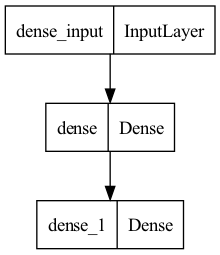

In [7]:
# 다이아그램 보기
tf.keras.utils.plot_model(model)

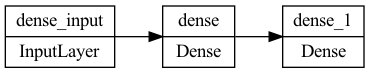

In [50]:
# 다이아그램 보기
tf.keras.utils.plot_model(model, rankdir='LR')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [52]:
issubclass(tf.keras.models.Sequential, tf.keras.models.Model) # Model 이 부모다!
# 부모가 더 기능이 많다!
# 객체지향 잘못 이해하는 사람들은 자식이 더 많다고 생각.
# 일반적으로 부모와 자식은 호환가능하게 만들고 자식이 더 적은 기능을 가진 경우가 많음.

True

In [53]:
tf.keras.models.Model.mro()

[keras.engine.training.Model,
 keras.engine.base_layer.Layer,
 tensorflow.python.module.module.Module,
 tensorflow.python.trackable.autotrackable.AutoTrackable,
 tensorflow.python.trackable.base.Trackable,
 keras.utils.version_utils.LayerVersionSelector,
 keras.utils.version_utils.ModelVersionSelector,
 object]

In [54]:
tf.keras.models.Sequential.mro()

[keras.engine.sequential.Sequential,
 keras.engine.functional.Functional,
 keras.engine.training.Model,
 keras.engine.base_layer.Layer,
 tensorflow.python.module.module.Module,
 tensorflow.python.trackable.autotrackable.AutoTrackable,
 tensorflow.python.trackable.base.Trackable,
 keras.utils.version_utils.LayerVersionSelector,
 keras.utils.version_utils.ModelVersionSelector,
 object]

In [55]:
# Model 로 만들어보기
# model2 = tf.keras.models.Model() # 이걸 맨 마지막에
input_ = tf.keras.Input(shape=(4,))  # input 부터 output 까지 합성함수가 어떻게 실행되는가 체인을 만들어야 함
# 즉 합성함수 체인 만들어나가는 것이 Model

In [56]:
x = tf.keras.layers.Dense(5)(input_)  # 클로저 테크닉
# tf.keras.layers.Dense(5) 이 함수에 (input_) 집어넣은 것

In [57]:
output = tf.keras.layers.Dense(3)(x) # 결과

In [ ]:
# 이 과정을 합성함수의 구조로 생각해보기.

In [58]:
model2 = tf.keras.models.Model(input_,output)  # 합성함수. 함수형 패러다임

In [59]:
model2.summary()
# Seqential 은 input layer 를 지정해도 summary에 뜨지 않았는데,
# Model 은 있음
# input 에 [(None, 4)] 처럼 list 있는 것이 multi

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
 dense_3 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.summary()  # Sequential

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


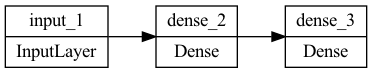

In [61]:
tf.keras.utils.plot_model(model2, rankdir='LR')

In [62]:
mo = tf.keras.applications.MobileNetV3Small()

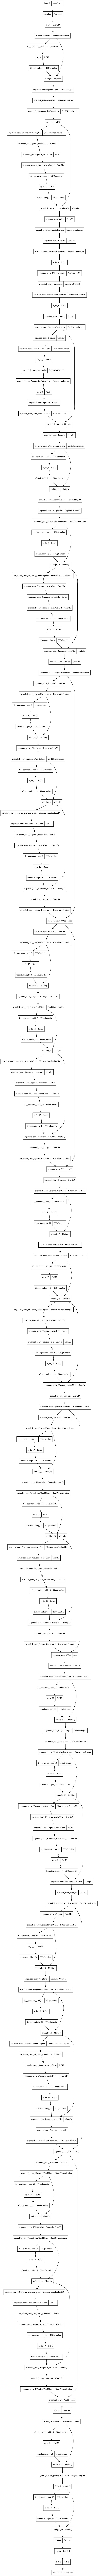

In [63]:
tf.keras.utils.plot_model(mo)

In [64]:
mo.summary()
# Sequential 은 1방향이니까 Connected to 가 없음
# list 와 Connected to 가 있으면 Model 을 활용한 것.

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_4[0][0]']                
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Multiply)                240)                              'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_14 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_19 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_14[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, None, None,   0          ['re_lu_19[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_9 (Multiply)          (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_17[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_11[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_26 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, None, None,   0          ['re_lu_26[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_14 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_16[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [ ]:
# 현대의 복잡한 모델은 Sequential 로 할 수 있는 것은 없다! 모조리 다 Model!!

In [65]:
model2 = tf.keras.models.Model(input_,output)  # 합성함수. 함수형 패러다임

In [ ]:
# Model 만드는 법 -> Input 으로 시작해서 layer 거쳐서 output 만들고 Model 에 넣기

In [66]:
input_ = tf.keras.Input(shape=(4,))
input2_ = tf.keras.Input(shape=(4,))

In [67]:
x = tf.keras.layers.Concatenate()([input_, input2_])  # 클로저 테크닉
# 이런 식으로 합칠수도 있다!

In [68]:
output = tf.keras.layers.Dense(3)(x) # 결과

In [70]:
model2 = tf.keras.models.Model([input_, input2_],output)  # 합성함수. 함수형 패러다임

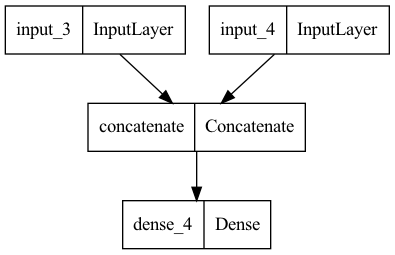

In [71]:
tf.keras.utils.plot_model(model2)

In [ ]:
# 이 과정을 합성함수의 구조로 생각해보기.

### Beginners 연습

In [87]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [92]:
X_train.flatten().shape

(47040000,)

In [93]:
47040000 / 60000

784.0

In [72]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
# tf.keras.layers.Flatten(input_shape=(28, 28)) 이 뜻은,
# (60000,28,28)은 전체 구조이고, 하나의 데이터는 (28,28)의 모양. 이게 60000개 들어간다는 것.
# 즉 (28, 28)이 input_shape. 이를 Flatten 에 넣어서 1차로 만든다.
# iris 에서는 input_shpae=(4,)

In [74]:
model.summary()
# 28 x 28 을 1차로 만드니까 (60000, 28*28=784)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [94]:
784*128 + 128

100480

In [ ]:
# 이것을 Model 로 풀어써보자!

In [95]:
input_ = tf.keras.Input(shape=(28,28))  # shape은 데이터 1개의 모양
# 여기서는 데이터 한 개가 2차원

# Dense 안에 집어넣으려면 1차로 만들어줘야 함
x = tf.keras.layers.Flatten()(input_)

x = tf.keras.layers.Dense(128)(x)

x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Dropout(0.2)(x)

output = tf.keras.layers.Dense(10)(x)

In [96]:
model = tf.keras.models.Model(input_, output)  # 이게 위 Sequential 과 완전히 똑같음.
# 남들이 Sequential 로 만들어 둔 거 나는 Model 로 만든다! 이제부터 모든 것이 Model 이 기본!
# 따라서 합성함수 어떻게 되는지 머릿속에 들어가 있어야 함.

# 전문가 방식은 상속을 통해서 객체지향화 한 것

In [ ]:
# algorithmic 모델링 -> 어떻게 내가 잘 구축하느냐에 따라서 성능이 다 바뀜.
# 법칙은, input(input_shape) 과 output(예측값의 종류) 맞추고, 그 이외의 나머지는 우리가 알고리즘을 짜야 함.
# sklearn 은 Input 과 output을 자동으로 해주지만, 텐서플로는 아님.
# 텐서플로는 output 에서 여러가지를 할 수 있기 때문에 자동으로 못 정해줌.
# sklearn 은 자동으로 원핫, 라벨링 해줌

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
mlp = MLPClassifier((128,))

In [99]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [100]:
input_ = tf.keras.Input(shape=(28,28))  # shape은 데이터 1개의 모양
x = tf.keras.layers.Flatten()(input_)
x = tf.keras.layers.ReLU()(x)

In [101]:
model = tf.keras.models.Model(input_, x)

In [102]:
model(X_train)

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# linear 함수는 f(ax+by) = af(x) + bf(y) 가 가능함
# ReLU 는 x < 0 일 때는 0, x >= 0 이면 y=x
# ReLU 는 어떤 문제 해결?
# 시그모이드나 tanh 은 layer 를 많이 쌓으면, 한번 0되기 시작하면 0이 계속 되어버려서 기울기 소실 현상이 생겨서 학습이 안됨.
# 그래서 deep 한 것을 만들 수 없었음. => 기울기 소실 현상
# 그런데 ReLU 는 포화 현상(saturation)이 없었음. 그래서 값이 계속 전파가 됨.
# activation func 에 linear 쓰면 안됨. linear combination 은 계속 linear 기 때문에.
# nn 의 핵심은 nonlinerity 임. 그래서 무조건 activation func 에는 non-linear 여야 함.

# ReLU 는 f(ax+by) = af(x) + bf(y) 이 조건을 만족시키지 않아서 non-linear.
# gradient exploding -> 기울기 소실의 반대. 이것도 수렴하지 않음.
# ReLU 는 2010년에 등장했는데, 좋은 점이 여러가지 였음.
# 수학적으로 미분이 간단했음.
# ReLU 를 쓰면 training accuracy 가 빨리 수렴함.

# 현재는 ReLU 를 기본 activation func 으로 사용함. 거의 모든 예시에 등장
# 문제점이 있음. x가 0보다 작은 범위는 값도 0이고 미분값도 계속 0. 그래서 dying ReLU 라는 현상이 생김.

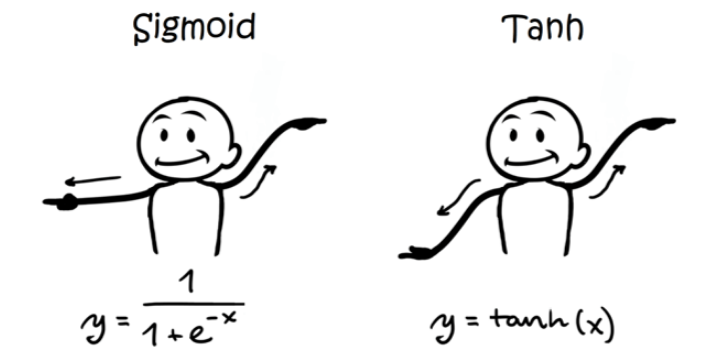

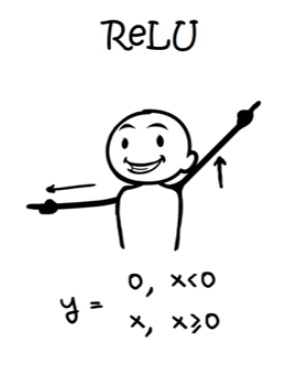

In [ ]:
# layers 는 layer 안에 들어가는 것들.
tf.keras.layers.

In [ ]:
# activation은 activations 에 다 있다!
# tensorflow addons 에 최신에 나온 activation 함수들 다 들어가 있음.
tf.keras.activations.
# 모델 안에 쓸 수는 없음. layer해서 Activation 을 분리 시켜 집어넣음

In [ ]:
# activation 방법 2 - Sequential 내에 분리시켜 사용하는 방법
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, input_shape=(4,)),
    tf.keras.layers.Activation('sigmoid'),
    tf.keras.layers.Dense(3)
])

# 이 방법을 수업시간에 사용할 것.
# batch normalization 을 사용하기 위해서는 이 테크닉을 써야 하기 때문
# 별도로 쓰려면 layer 개념만 가능 ->  tf.keras.layers.Activation('sigmoid')

In [103]:
# Model 쓰는 방식
input_ = tf.keras.Input(shape=(28,28))  # shape은 데이터 1개의 모양
x = tf.keras.layers.Flatten()(input_)
x = tf.keras.layers.Dense(128)(x)
#x = tf.keras.layers.ReLU()(x)  # 얘는 객체인데 ()를 씀으로써 함수가 됨.
x = tf.keras.activations.relu(x) # 함수라서 바로 이렇게 씀. x 를 어디다가 넣는지가 중요!! x의 위치!!
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(10)(x)

In [104]:
# layer 를 stacking 해서 Model 이 composition
model = tf.keras.models.Model(input_, output)

In [105]:
model(X_train)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[-189.8432   ,  -47.834515 , -133.82314  , ...,   -8.642902 ,
         123.807755 ,  111.81262  ],
       [ -68.92231  ,   33.236927 ,  -66.738815 , ...,   26.762806 ,
           5.5902615,    6.801033 ],
       [ -70.90283  ,  110.17866  ,   50.403294 , ...,   81.107765 ,
         174.39343  ,   23.581072 ],
       ...,
       [-270.09506  ,  -30.433872 ,  -57.162117 , ...,   -6.593854 ,
          48.239876 ,   32.045956 ],
       [  33.02735  ,  108.071266 ,  -56.809784 , ...,  125.497826 ,
          52.76394  ,   16.187614 ],
       [-140.80948  ,  -43.323357 ,   55.50215  , ...,   68.47414  ,
         121.305374 ,    5.2378283]], dtype=float32)>

In [106]:
# Sequential 방식
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [107]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 re_lu_35 (ReLU)             (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [71]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.activations.relu(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

TypeError: Missing required positional argument

In [ ]:
# sequential 은 안되는데 Model 은 됨. 함수형 패러다임
# Sequential 은 쉽게 사용하기 위해서 layer. 안에 있는 애들만 가능함.
# Model 은 함수형 패러다임으로 어떻게 합성함수를 만들어나가는 과정만 구현하면 됨.

In [108]:
input_ = tf.keras.Input(shape=(28,28))  # shape은 데이터 1개의 모양
x = tf.keras.layers.Flatten()(input_)
x = tf.keras.layers.Dense(128)(x)  # Dense 는 1차원 데이터만 받고 그 1차원데이터가 쌓여서 2차원 데이터가 됨
#x = tf.keras.layers.ReLU()(x)  # 얘는 객체인데 ()를 씀으로써 함수가 됨.
x = tf.nn.relu(x)   # 심지어 Model 방식에서는 내가 만든 함수까지 넣을 수도 있다!!
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(10)(x)

In [109]:
model = tf.keras.models.Model(input_, output)

In [110]:
model(X_train)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[ -14.848634 ,  120.50445  ,   10.145709 , ...,  -39.288708 ,
          68.54996  ,  110.0526   ],
       [  17.809547 ,  225.4358   ,   22.137062 , ...,   75.30787  ,
         102.8201   ,   78.09897  ],
       [ 117.69355  ,  211.18355  ,   31.148478 , ...,  -17.695826 ,
         199.86578  ,  -58.802647 ],
       ...,
       [ -31.794224 ,  -80.867096 ,  121.18935  , ..., -164.18332  ,
          -4.9295235,  142.79846  ],
       [ -38.510857 ,   -7.6035233,   41.224525 , ...,   54.890343 ,
           7.288243 ,  156.21043  ],
       [ -99.007675 ,  -54.26121  ,   27.227242 , ...,  -98.173775 ,
         111.791824 ,   30.173052 ]], dtype=float32)>

In [ ]:
# 다시 activation
# sigmoid, hyperbolic tanh, ReLU
# ReLU 도 Dying ReLU 문제가 있음.
# 이 문제점을 해결한 가장 쉬운 애가
# 0보다 작은 애들을 아주 작게 0이 안되도록 누수(leaky)시킴
# 이게 leaky ReLU

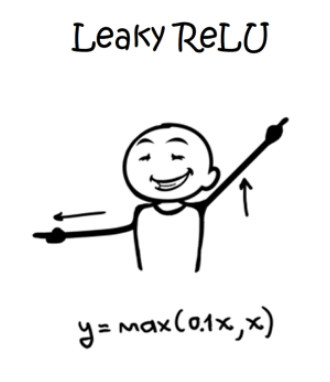

In [ ]:
# Dying ReLU 가 많이 나오는 경우는,
# 1. learning rate 가 클 때
# 2. negative bias  => wx + b  에서 bias 가 -가 되는 것.

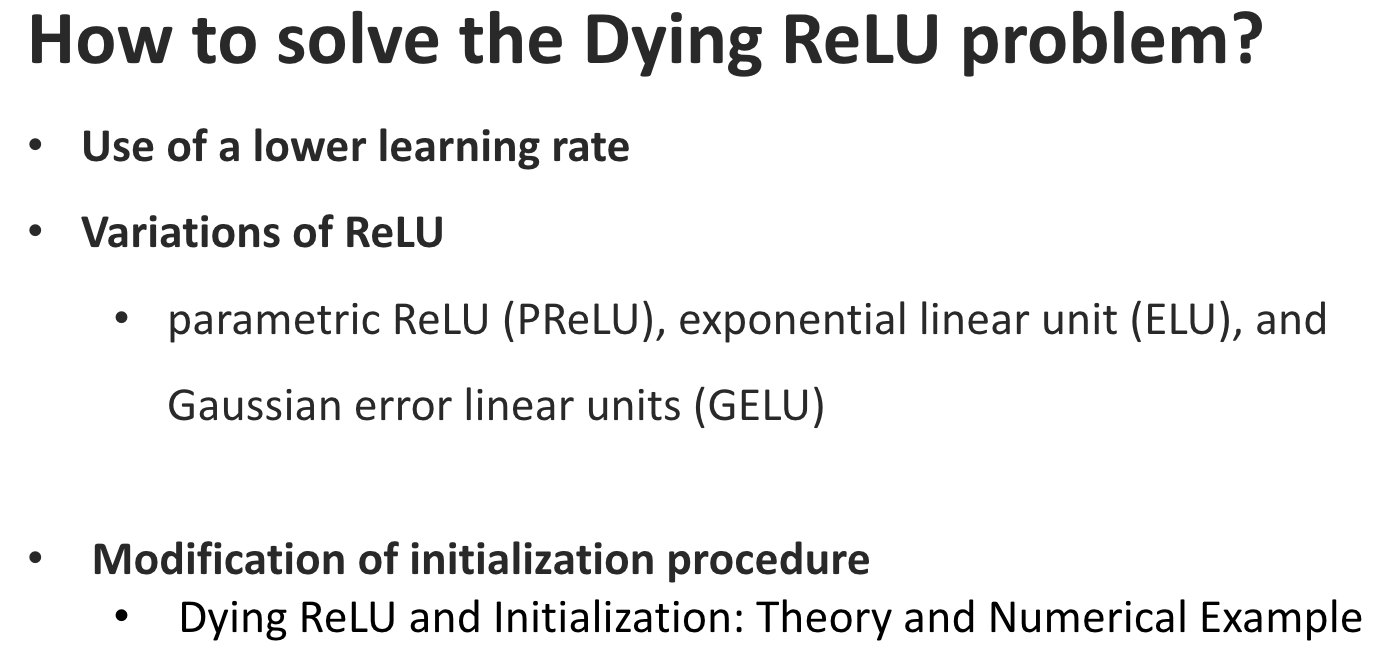

In [ ]:
# Dense
tf.keras.layers.Dense
# batch normalization 때문에 activation 바로 안 넣음
# batch normalization 은 dense 와 activation 사이에 들어감. 이 때문에 분리하는 테크닉으로 구현함

# Init signature:
# tf.keras.layers.Dense(
#     units,
#     activation=None,
#     use_bias=True,             => 데이터가 없으면 bias도 찾기 힘들기 때문에 이런 테크닉이 있음.
#     kernel_initializer='glorot_uniform',
#     bias_initializer='zeros',
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs,
# )

In [ ]:
# summary()

In [115]:
tf.keras.backend.clear_session()   # dense 숫자 초기화

In [112]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [118]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, input_shape=(4,), name='a'),
  tf.keras.layers.Dense(3, name='b')
], name='c')

In [119]:
model.summary()

Model: "c"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 a (Dense)                   (None, 5)                 25        
                                                                 
 b (Dense)                   (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 위에서 Param 중 25가 뜻하는 것은 무엇일까?
# fully connected 니까 input 에서 가는 것은 4*5 = 20
# 각각 마다 bias 가 1개씩
# 따라서 w 20 개 b 5 개 해서 25개
# 18은 5 * 3(w) + 3(b)

# 즉 학습해서 구해야하는 애들인 것.

In [128]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy())

In [122]:
model.fit(data.data, data.target)

ValueError: in user code:

    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [124]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy()) # 라벨링을 원핫 인코딩으로 바꿔주기

In [125]:
model.fit(data.data, data.target)

5/5 [==============================] - 0s 1ms/step - loss: 6.0658


In [129]:
target = tf.keras.utils.to_categorical(data.target) # 직접 바꿔서 target 으로 설정

In [130]:
model.fit(data.data, target)

5/5 [==============================] - 0s 1ms/step - loss: 11.0678


In [ ]:
# Dense  => fully connected 만들어주는 애 -> NN 기본 layer
tf.keras.layers.Dense

# Init signature:
# tf.keras.layers.Dense(
#     units,
#     activation=None,
#     use_bias=True,
#     kernel_initializer='glorot_uniform',  => 텐서플로에서는 웨이트(w) 를 kernel 이라고 함. 초기화하는 테크닉
#                                             초기화하는 테크닉 중요함. gradient 가 0이 되면 안됨.
#     bias_initializer='zeros',
#              bias 초기값도 중요함. ReLU 는 negative bias 가 오면 dying 됨. 초기값 음수되면 위험하고 그 크기가 크면 더 위험함
#     kernel_regularizer=None,   => weight 를 regularizer 패널티하는 테크닉
#             layer 한개 퍼셉트론. wx+b, 통계에서 쓰는 Lasso, Ridge 를 그대로 씀. 즉 그냥 fully connect 쓴다고 다 되는 것이 아님.
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs,
# )

In [ ]:
# fully connect 와 activation 을 stacking 한 거로 구조를 만들고 랜덤하게 w 와 b 가 초기화 됨.
# 우리의 목적은 내 타겟에 맞게 w 와 b 를 조절해서 내가 원하는 결과값을 내게 하는 것. 그게 머신러닝에서 학습.
# 그 학습을 하기 위한 수많은 테크닉이 있다!
# 이게 굉장히 복잡한 과정을 가지고 있기 때문에, 프레임워크마다 지원하는 애들이 다름.
# 텐서플로나 파이토치는 얘를 computational graph 형태로 바꿔서 학습을 시킴
# 따라서 computational graph 로 바꾸는 과정이 학습 전에 항상 필요함. 그게 compile 이다!

# 학습을 시킨다는 것은 loss func 의 최소값을 구하는 것과 같다.
# compile 할 때 loss func 을 지정해주어야 함.

In [ ]:
# 학습을 보자! -> NN 에서 제일 어려운 파트다!
# gradient descent 를 이용한 backprobagation(역전파)

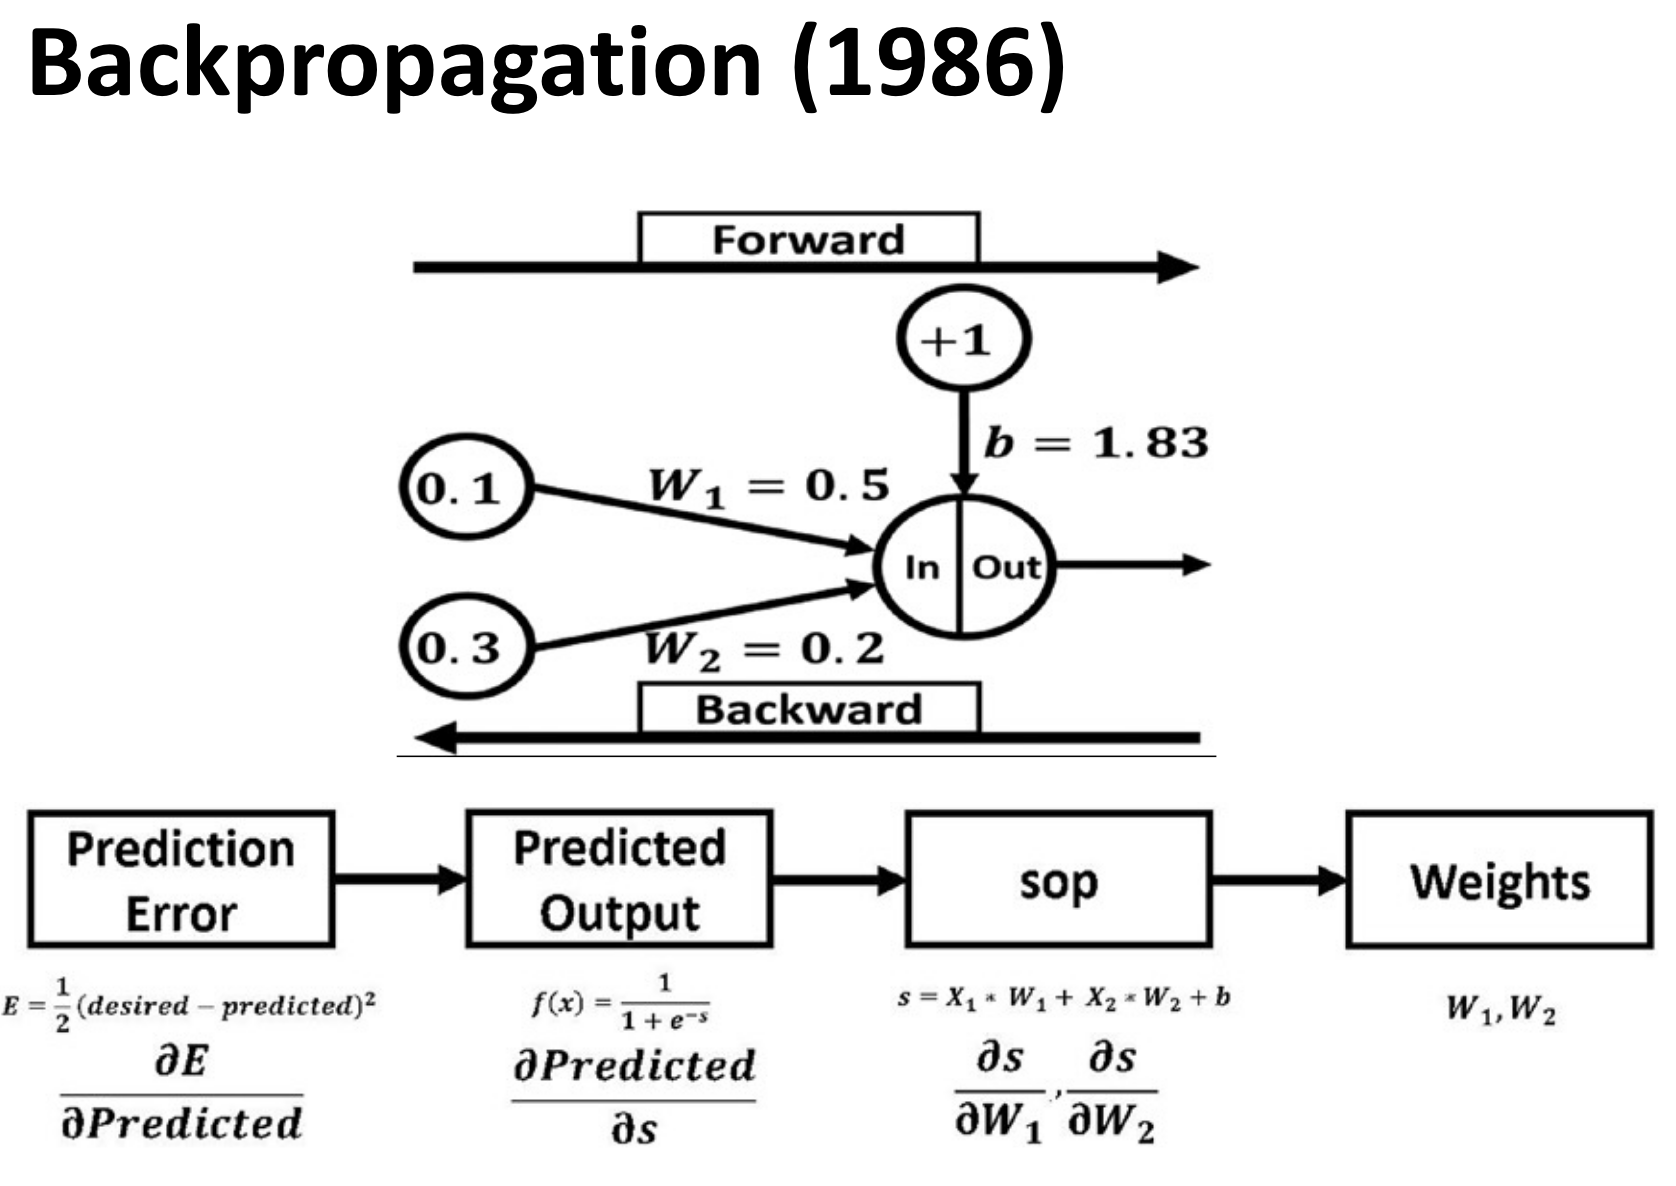

In [ ]:
# 학습을 통해서 찾게 된 이론적 배경은 심리학에서 나옴
# hebb's rule -> hebbian learning
# 기존의 w 는 input/output 에 의해서 변화된다! => 그런데 목적값이 없어서 unsupervised

# delta rule 이 gradient descent 를 도입을 함.

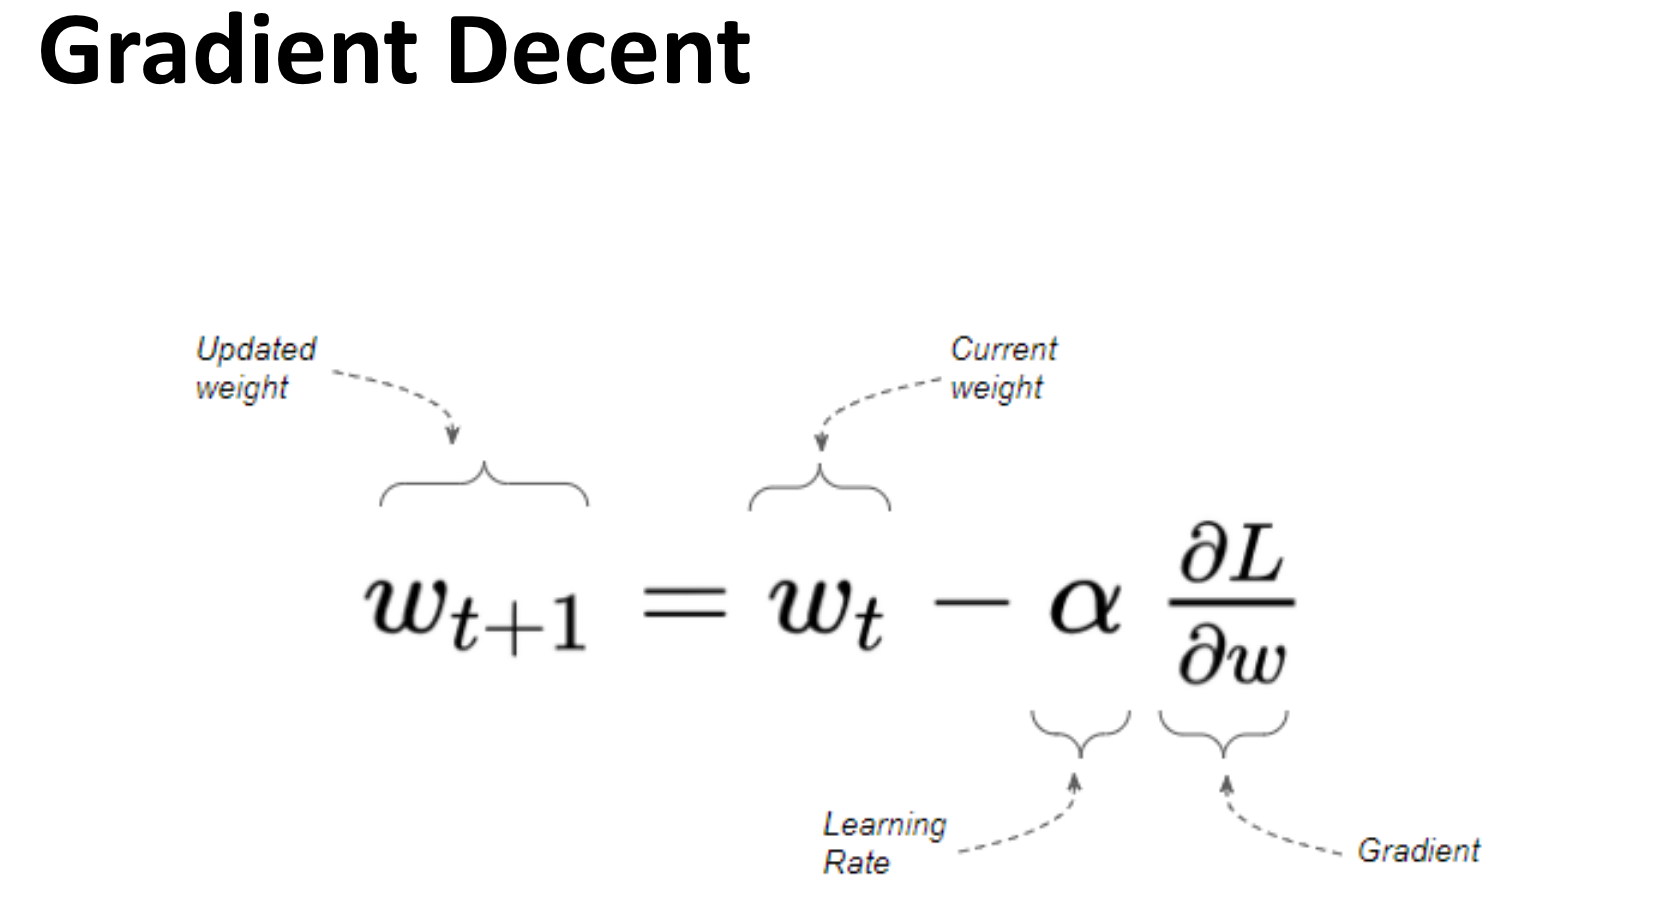

In [ ]:
# learning rate 를 조절한다는 것은 update 를 조절한다는 것.
# gradient descent 는 어떻게 업데이트 하는가?
# 미분이라는 것은 근사값을 구하는 것.
# 미분값에 learning rate 를 계속 구해서 둘을 활용하여 loss func이 0에 가까이 가는 것.
# 즉, 컴퓨터에서 반복을 통해서 최소값을 구하는 방식. gradient 를 계속 구해서 밑으로 내려감
# w를 업데이트하는 방식임.

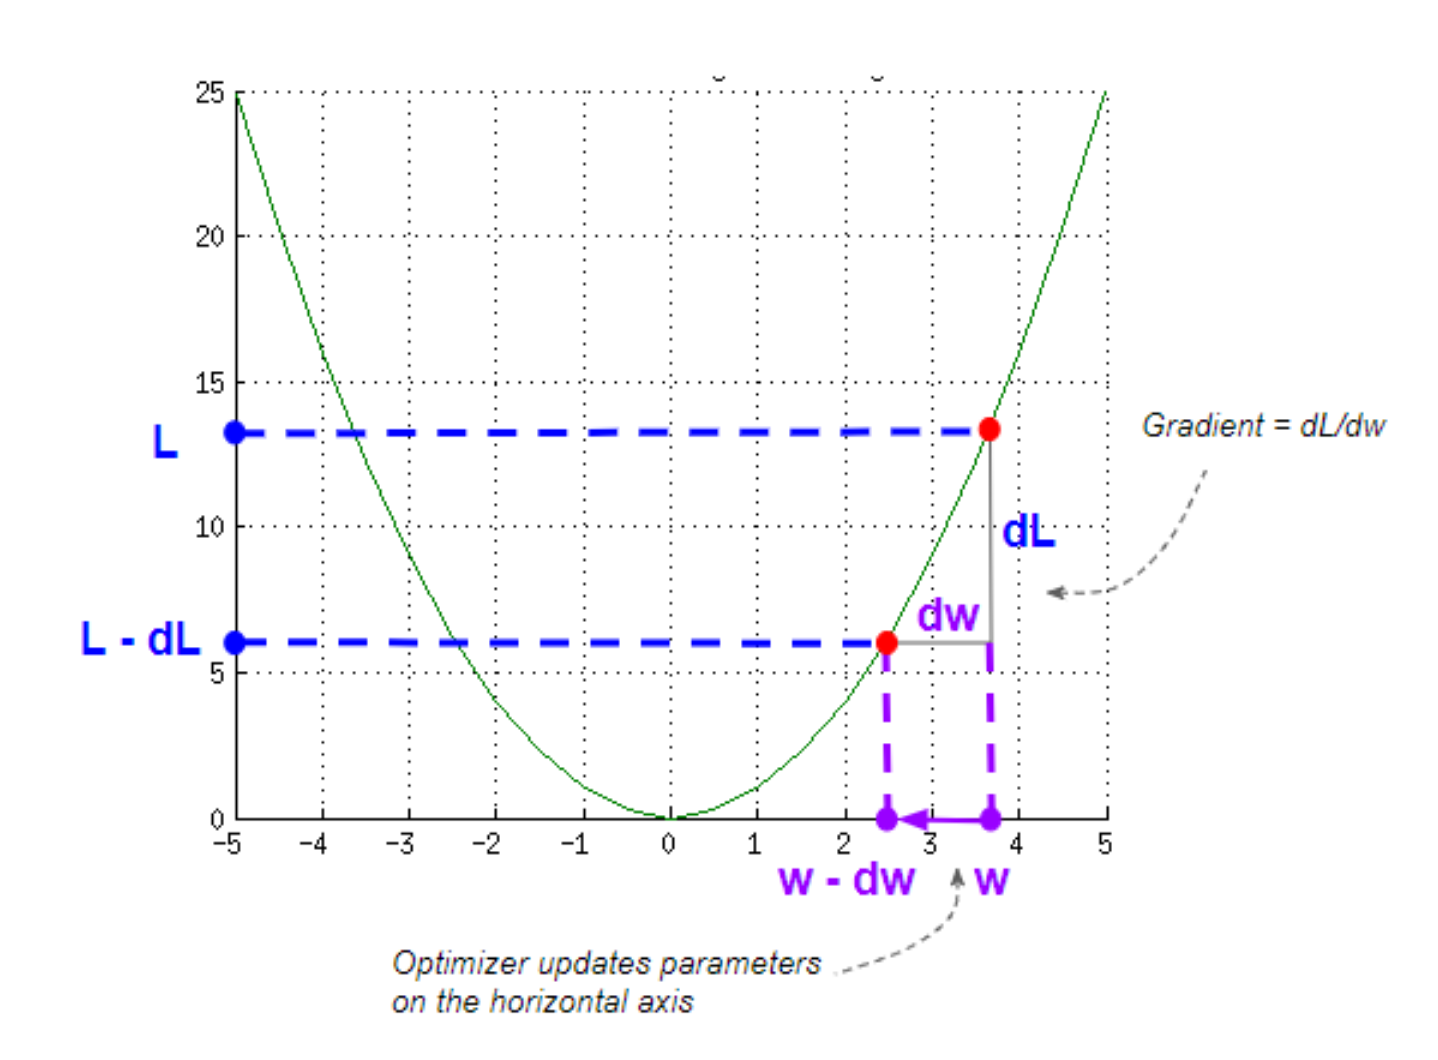

In [ ]:
# gradient descent 는 1차식에 가장 간단한 방법임. 반복을 통해서 최소값 찾는 가장 간단한 방식이 기울기 하강.
# 임의의 점에서 편미분값을 구할 수 있음.
# 그 편미분값과 내가 정한 learning rate 를 곱해서 기존에 있던 weight 를 업데이트
# learning rate 가 크면 한번에 점프해버림.
# learning rate 가 작으면 아주 조금씩 움직임.
# 그러면, learning rate 를 지정하는 것도 골치아픔.

In [ ]:
# 이 gradient 기반으로 learning rate 와 gradient 를 어떻게 바꾸느냐에 따라 알고리즘이 확장된다!
# 이것도 계속 최신기법이 나옴.
tf.keras.optimizers.  # learning rate 와 gradient 를 조절해주는 방법이 optimizer다!
# Adam 이 learnig rate 와 Gradient 를 잘 조절해줌. 최소 기준 이상은 가능 알고리즘.
# 이것도 자동, 수동이 있음.
# Optimizer 알고리즘 마다 최소값을 찾아가는데 No Free Lunch(상황별로 다 다르다) 임.

In [131]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(5, input_shape=(4,), name='a'),
  tf.keras.layers.Dense(3, name='b')
], name='c')

In [132]:
# 실제값-예측값을 바로 숫자 빼는 것이 아니라 다른 형태로 바꿔서 그것을 최소화 시키는 것이 실제값=예측값 시키는 것.
# 중요한 것이 바로 loss func 정하는 것.
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam())  # 객체 방식은 파라미터 값 바뀌어도 함수 리턴
# partial 를 쓰면 함수를 디폴트값 바꿔서 쓸 수 있긴 함
# 코세라 advanced tensorflow 들으면 도움될 것.
# gradient descent 를 하는 방식들이 점점 발전함. 그냥 하는 애는 tf.keras.optimizers.SGD
# gradient descent를 기반으로 역전파 테크닉을 만들었음.

In [ ]:
# layer 가 하나면 gradient descent 가 잘 먹힘.
# layer 를 쌓으니까 한번에 gradient descent 가 안됨. w 가 너무 많아져서.
# 뒤에서부터 차례대로 w를 업데이트 하는 것이 back propagation. 그랬더니 수렴되더라!

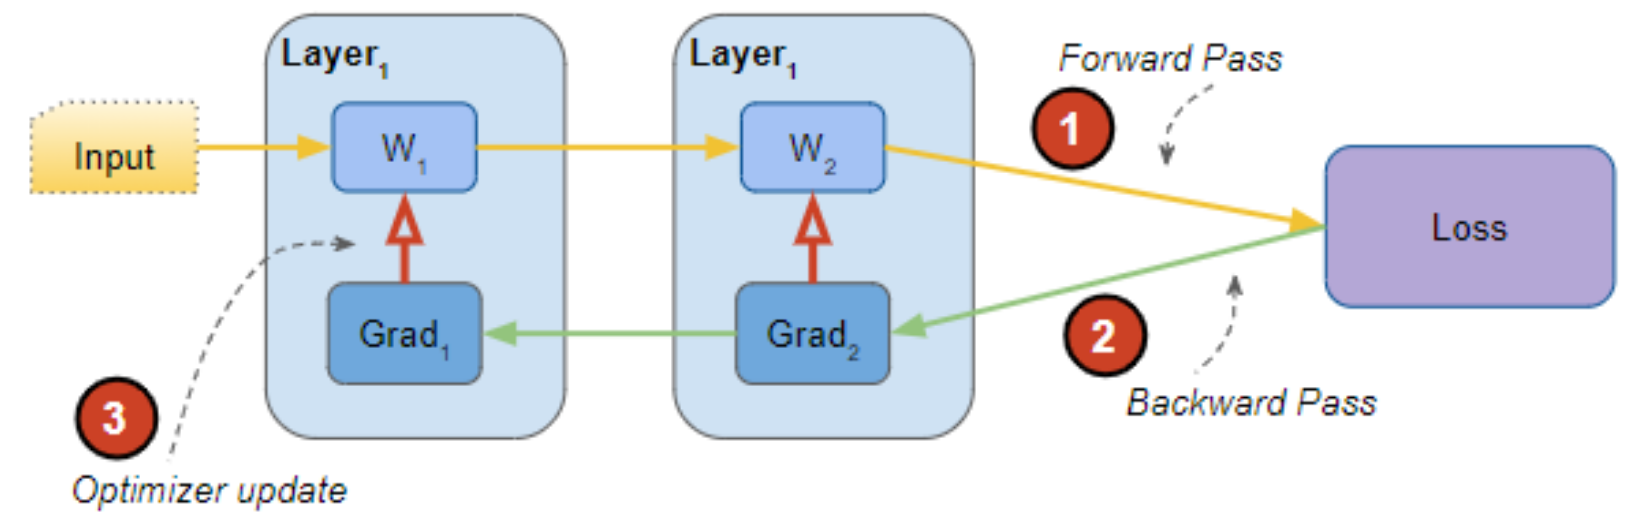

In [133]:
from sklearn.datasets import load_iris

In [164]:
data = load_iris()

In [165]:
# MinMax -> 확실히 loss 값이 줄어듦
data.data, data.target = data.data / 255, data.target / 255

In [136]:
# 학습테크닉
# fit 을 하면 내부적으로 backpropagation 을 한다!
# epoch
model.fit(data.data, data.target, epochs=5)
# data가 원핫 아니라서 오류

Epoch 1/5


ValueError: in user code:

    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [137]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.SGD())  # SparseCategoricalCrossentropy 이 라벨을 원핫으로 바꿔줌

In [138]:
model.fit(data.data, data.target, epochs=10)
# fit 이 역전파 하는 과정을 포함하고 있는 것.
# epochs 을 정하지 않으면 1번만 됨. epochs 정하지 않고 5번 실행하면 epochs=5 랑 똑같은 효과.
# 누적된 epochs 를 re_fit

Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0980
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0980
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0979
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0981
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0979
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0980
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0979
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0980
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0979


In [ ]:
# 위에서 거슬리는 것이 5/5, Out 값
# Out 값은 재할당을 해주어야 함.
# step 이 나와있음.  step 은 데이터의 개수/batch_size

In [124]:
len(data.data)

150

In [139]:
model.fit(data.data, data.target, batch_size=10, epochs=10)

Epoch 1/10
15/15 [==============================] - 0s 1ms/step - loss: 1.0981
Epoch 2/10
15/15 [==============================] - 0s 980us/step - loss: 1.0984
Epoch 3/10
15/15 [==============================] - 0s 1ms/step - loss: 1.0983
Epoch 4/10
15/15 [==============================] - 0s 984us/step - loss: 1.0981
Epoch 5/10
15/15 [==============================] - 0s 1ms/step - loss: 1.0984
Epoch 6/10
15/15 [==============================] - 0s 995us/step - loss: 1.0981
Epoch 7/10
15/15 [==============================] - 0s 1ms/step - loss: 1.0983
Epoch 8/10
15/15 [==============================] - 0s 889us/step - loss: 1.0986
Epoch 9/10
15/15 [==============================] - 0s 874us/step - loss: 1.0982
Epoch 10/10
15/15 [==============================] - 0s 996us/step - loss: 1.0982


In [140]:
model.fit(data.data, data.target, batch_size=30, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0980
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0979
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0979
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0977
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 1.0979


In [ ]:
# 즉 전체 데이터 개수에서 batch_size 만큼 나눔.

In [141]:
model.fit(data.data, data.target, batch_size=51, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 1ms/step - loss: 1.0977
Epoch 2/10
3/3 [==============================] - 0s 1ms/step - loss: 1.0979
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0977
Epoch 4/10
3/3 [==============================] - 0s 1ms/step - loss: 1.0977
Epoch 5/10
3/3 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 6/10
3/3 [==============================] - 0s 1ms/step - loss: 1.0977
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0977
Epoch 8/10
3/3 [==============================] - 0s 1ms/step - loss: 1.0978
Epoch 9/10
3/3 [==============================] - 0s 1ms/step - loss: 1.0977
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 1.0978


In [ ]:
# 학습할 때 gradient descent 로 역전파해서 weight 를 업데이트 함.
# 전체 데이터를 한 번 하는 것이 1 epoch
# 학습시킬 때, batch 라는 개념이 들어감.
# 기본적으로 batch 방식으로 학습하면, 전체데이터를 다 씀. iris 에서는 150개를 다 입력해서 한번에 weight 를 업데이트
# 이것과 극단적으로 상반된 애는 1개만 뽑아서 업데이트 시키는 방법이 있음. 랜덤하게 뽑는 것. 그게 SGD
# batch 와 SGD (전체 ~ 1개) 사이에 조절하는 것이 mini batch ; 이것도 하이퍼 파라미터다!
# batch 로 하면 한번에 하니까 학습시간은 줄어들지만 전체 퉁치기 때문에 섬세하지 못할 수 있음.
# 작게 하면 메모리 양이 작음. 그러면서 전체를 안보고 작은 걸 보기 때문에 weight 를 업데이트하면서 수렴이 잘 안됨.
# 우리는 컴퓨터 메모리가 작아서 batch 크기를 작게 할 수밖에 없을 것.
# 텐서플로우에서 기본적인 batch size 는 32임 => 전체 데이터를 쪼개서 업데이트 시킴

In [142]:
model.fit(data.data, data.target, batch_size=150, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0977
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0977
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0977
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0977
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0977
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0977
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0977
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0977
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0977
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0977


In [ ]:
# 전체 데이터를 batch_size 로 나눈 것이 step
# 즉 위에서 1/1 이 step
# n epoch * m step => 업데이트 횟수 = n*m

In [166]:
# call back
# output 을 없애기 위해 재할당
history = model.fit(data.data, data.target, batch_size=30, epochs=10) # 학습 잘 됐는지 확인하기 위해서 재할당
# 이러면 학습이 잘 됐는지 확인도 가능하고, Out 값을 없앨 수 있다!

Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.9757
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.9240
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.8753
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.8293
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.7859
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 0.7449
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.7061
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6696
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6351
Epoch 10/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6025


In [167]:
history.history  # loss 가 변화되는 과정을 보여줌.

{'loss': [0.9756569266319275,
  0.9240120649337769,
  0.8752852082252502,
  0.8292913436889648,
  0.7858651876449585,
  0.744858980178833,
  0.7061383128166199,
  0.6695802807807922,
  0.6350715160369873,
  0.6025059223175049]}

In [147]:
import pandas as pd

<AxesSubplot: >

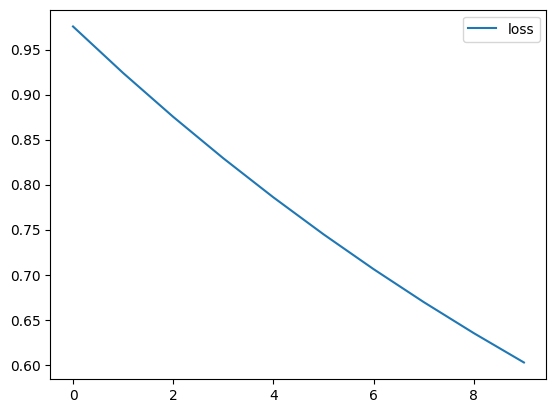

In [168]:
# learning curve
pd.DataFrame(history.history).plot.line()

In [176]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.SGD(), metrics=['acc'])

In [177]:
history = model.fit(data.data, data.target, batch_size=50, epochs=10) # 학습 잘 됐는지 확인하기 위해서

Epoch 1/10
3/3 [==============================] - 0s 1ms/step - loss: 0.2636 - acc: 0.3333
Epoch 2/10
3/3 [==============================] - 0s 1ms/step - loss: 0.2567 - acc: 0.3333
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2500 - acc: 0.3333
Epoch 4/10
3/3 [==============================] - 0s 1ms/step - loss: 0.2436 - acc: 0.3333
Epoch 5/10
3/3 [==============================] - 0s 1ms/step - loss: 0.2374 - acc: 0.3333
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2314 - acc: 0.3333
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2256 - acc: 0.3333
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2200 - acc: 0.3333
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2147 - acc: 0.3333
Epoch 10/10
3/3 [==============================] - 0s 1ms/step - loss: 0.2095 - acc: 0.3333


<AxesSubplot: >

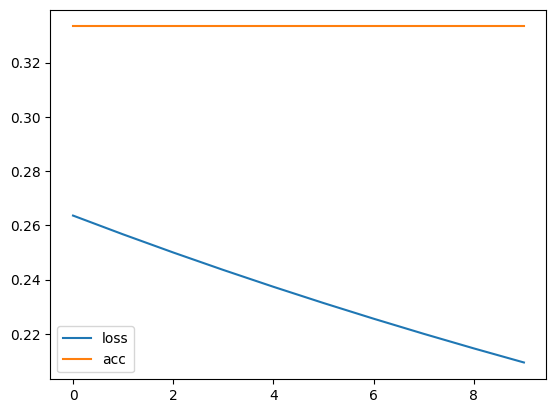

In [178]:
pd.DataFrame(history.history).plot.line()

In [ ]:
# 함수를 실행시키고 나서 호출된 결과로 실행시키는 것이 callback  -> 또 다룰 것
# 이 동네에서 callback 은 epoch 이 실행될 때마다.
# 그러면 step 이 실행될 때 마다도 할 수 있음.
history = model.fit(data.data, data.target, batch_size=50, epochs=10, callbacks=)

In [ ]:
tf.keras.callbacks.LearningRateScheduler  # 내가 규칙을 정함. epoch 몇 번 뒤에 learning rate 를 줄이는 것.
# learning rate 를 줄이는 것은 섬세하게 줄이는 것. loss func 이 더 이상 떨어지지 않으면 learning rate 를 줄여도 좋을 것.

tf.keras.callbacks.ReduceLROnPlateau # 고원현상. 더 이상 성능이 올라가지 않거나 떨어지지 않을 떄.
# 그런 상황이 epoch 을 5번 돌았는데 이런 현상이 발생하면 learning rate 를 줄임.

In [181]:
history = model.fit(data.data, data.target, batch_size=50, epochs=10, validation_split=0.3,
                   callbacks=tf.keras.callbacks.ReduceLROnPlateau())

Epoch 1/10
3/3 [==============================] - 0s 27ms/step - loss: 0.1630 - acc: 0.4762 - val_loss: 0.1612 - val_acc: 0.0000e+00 - lr: 0.0100
Epoch 2/10
3/3 [==============================] - 0s 14ms/step - loss: 0.1595 - acc: 0.4762 - val_loss: 0.1578 - val_acc: 0.0000e+00 - lr: 0.0100
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1562 - acc: 0.4762 - val_loss: 0.1545 - val_acc: 0.0000e+00 - lr: 0.0100
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.1529 - acc: 0.4762 - val_loss: 0.1514 - val_acc: 0.0000e+00 - lr: 0.0100
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1498 - acc: 0.4762 - val_loss: 0.1483 - val_acc: 0.0000e+00 - lr: 0.0100
Epoch 6/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1467 - acc: 0.4762 - val_loss: 0.1453 - val_acc: 0.0000e+00 - lr: 0.0100
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1438 - acc: 0.4762 - val_loss: 0.1424 - val_acc: 0.

<AxesSubplot: >

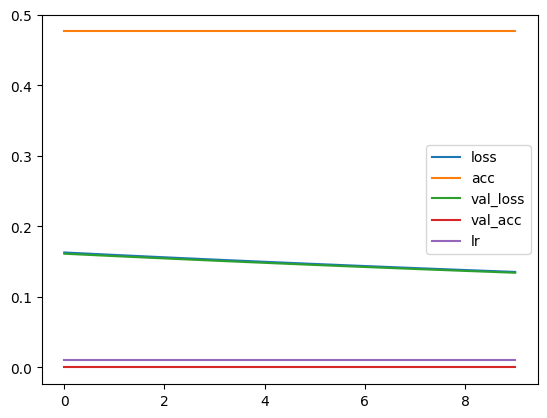

In [182]:
pd.DataFrame(history.history).plot.line()

In [ ]:
# 학습테크닉은 정말 많음.